In [40]:
# target parameters of f(x) = m*x + b
a = 3 
b = -2 
c = -3
d = 4

In [41]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)   #genero 10000 numeri casuali tra -1 e 1 (train set)
x_valid = np.random.uniform(-1, 1, 1000)    #genero 1000 numeri casuali tra -1 e 1 (validation set)
x_valid.sort()                            #ordino gli elementi
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal (target) function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train **3 + b * x_train **2 +c * x_train + d, sigma) 
y_valid = np.random.normal(a * x_valid **3 + b * x_valid **2 +c * x_valid + d, sigma)

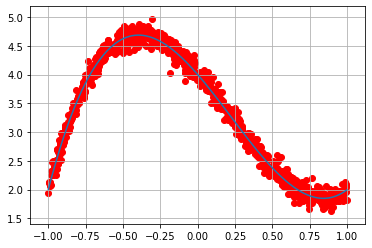

In [42]:
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [43]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model=tf.keras.Sequential()
model.add(Dense(3, input_shape=(1,), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1,  ))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 1.6333 - mse: 1.6333 - val_loss: 0.5375 - val_mse: 0.5375
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.3689 - mse: 0.3689 - val_loss: 0.2086 - val_mse: 0.2086
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1110 - mse: 0.1110 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0406 - mse: 0.0406 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0273 - val_mse: 0.0273
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0251 - val_mse: 0.0251
Epoch 7/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0246 - mse: 0.0246 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 8/50
313/313 [==============================] - 1s 2ms/step - loss: 0.

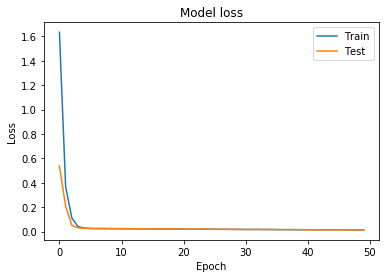

In [45]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

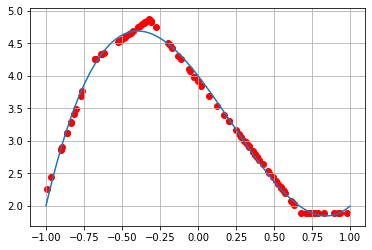

In [46]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

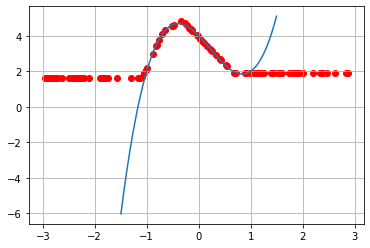

In [47]:
x_valid = np.random.uniform(-1.5, 1.5, 1000)
x_valid.sort()  
y_target = a * x_valid **3 + b * x_valid **2 +c * x_valid + d # ideal (target) function
x_predicted = np.random.uniform(-3, 3, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

In [48]:
save_model_path='Saved/model_1_50e'
model.save(filepath=save_model_path, include_optimizer=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Saved/model_1_50e/assets
